1. Descriptive analysis + data visualization (exploratory data analysis),
2. Classification along with detailed accuracy assessment,

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix


sns.set(font_scale=1.5)
sns.set_style("darkgrid")
sns.set_palette("pastel")

In [67]:
plt.rcParams["figure.figsize"] = [15, 6]

In [68]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [69]:
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [70]:
print(list(data.columns))
print(data.shape)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
(7043, 21)


<center>


**Table 1: Customer Churn Dataset** 

| Feature          | Description                                           | Type                  |
|------------------|-------------------------------------------------------|-----------------------|
| customerID       | Customer ID, a unique identifier                       | Categorical           |
| gender           | Whether the customer is male or female                 | Categorical           |
| SeniorCitizen    | Whether the customer is a senior citizen (1 or 0)      | Dichotomous categorical |
| Partner          | Whether the customer has a partner (Yes or No)         | Categorical           |
| Dependents       | Whether the customer has dependents (Yes or No)        | Categorical           |
| tenure           | Number of months the customer has stayed               | Integer-valued         |
| PhoneService     | Whether the customer has phone service (Yes or No)      | Categorical           |
| MultipleLines    | Whether the customer has multiple lines                | Categorical           |
| InternetService  | Customer’s internet service provider                   | Categorical           |
| OnlineSecurity   | Whether the customer has online security               | Categorical           |
| OnlineBackup     | Whether the customer has online backup                 | Categorical           |
| DeviceProtection | Whether the customer has device protection             | Categorical           |
| TechSupport      | Whether the customer has tech support                  | Categorical           |
| StreamingTV      | Whether the customer has streaming TV                  | Categorical           |
| StreamingMovies  | Whether the customer has streaming movies              | Categorical           |
| Contract         | The contract term of the customer                      | Categorical           |
| PaperlessBilling | Whether the customer has paperless billing             | Categorical           |
| PaymentMethod    | The customer’s payment method                          | Categorical           |
| MonthlyCharges   | The amount charged to the customer monthly             | Continuous            |
| TotalCharges     | The total amount charged to the customer               | Continuous            |
| Churn            | Whether the customer churned (Yes or No)               | Categorical           |

</center>

In [71]:
data = data.drop(columns="customerID")

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [73]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")

In [74]:
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [75]:
data["TotalCharges"].fillna(0, inplace=True)

In [76]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [77]:
data.duplicated().sum()

22

In [78]:
data.drop_duplicates(inplace=True)

In [79]:
no_phone_service_from_multiplelines = data.MultipleLines[
    data.MultipleLines == "No phone service"
].index.to_list()


no_phone_Service = data.PhoneService[data.PhoneService == "No"].index.to_list()


no_phone_Service == no_phone_service_from_multiplelines

True

In [80]:
data.OnlineSecurity[
    data.OnlineSecurity == "No internet service"
].index.to_list() == data.OnlineSecurity[data.InternetService == "No"].index.to_list()

True

In [81]:
data[data.OnlineSecurity == "No internet service"].index.to_list() == data[
    data.OnlineBackup == "No internet service"
].index.to_list() == data[
    data.DeviceProtection == "No internet service"
].index.to_list() == data[
    data.TechSupport == "No internet service"
].index.to_list() == data[
    data.StreamingTV == "No internet service"
].index.to_list() == data[
    data.StreamingMovies == "No internet service"
].index.to_list()

True

In [82]:
columns = [
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
]

indices = [
    data[data[column] == "No internet service"].index.to_list() for column in columns
]

all_equal = all(idx == indices[0] for idx in indices)
all_equal

True

In [83]:
data.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

# Preliminary analysis of variables

<center>

**Table 2: Feature Distribution in Dataset**

| Feature            | Categories              | Count |
|--------------------|-------------------------|------:|
| Gender             | Male                    |  3555 |
|                    | Female                  |  3488 |
| Senior Citizen     | 0                       |  5901 |
|                    | 1                       |  1142 |
| Partner            | Yes                     |  3402 |
|                    | No                      |  3641 |
| Dependents         | Yes                     |  2110 |
|                    | No                      |  4933 |
| Phone Service      | Yes                     |  6361 |
|                    | No                      |   682 |
| Multiple Lines     | Yes                     |  2971 |
|                    | No                      |  3390 |
|                    | No phone service        |   682 |
| Internet Service   | Fiber optic             |  3096 |
|                    | DSL                     |  2421 |
|                    | No                      |  1526 |
| Online Security    | Yes                     |  2019 |
|                    | No                      |  3498 |
|                    | No internet service     |  1526 |
| Online Backup      | Yes                     |  2429 |
|                    | No                      |  3088 |
|                    | No internet service     |  1526 |
| Device Protection  | Yes                     |  2422 |
|                    | No                      |  3095 |
|                    | No internet service     |  1526 |
| Tech Support       | Yes                     |  2044 |
|                    | No                      |  3473 |
|                    | No internet service     |  1526 |
| Streaming TV       | Yes                     |  2707 |
|                    | No                      |  2810 |
|                    | No internet service     |  1526 |
| Streaming Movies   | Yes                     |  2732 |
|                    | No                      |  2785 |
|                    | No internet service     |  1526 |
| Contract           | Month-to-month          |  3875 |
|                    | Two year                |  1695 |
|                    | One year                |  1473 |
| PaperlessBilling   | Yes                     |  4171 |
|                    | No                      |  2872 |
| Payment Method     | Electronic check        |  2365 |
|                    | Mailed check            |  1612 |
|                    | Bank transfer (automatic)|  1544 |
|                    | Credit card (automatic) |  1522 |
| Churn              | Yes                     |  1869 |
|                    | No                      |  5174 |

</center>



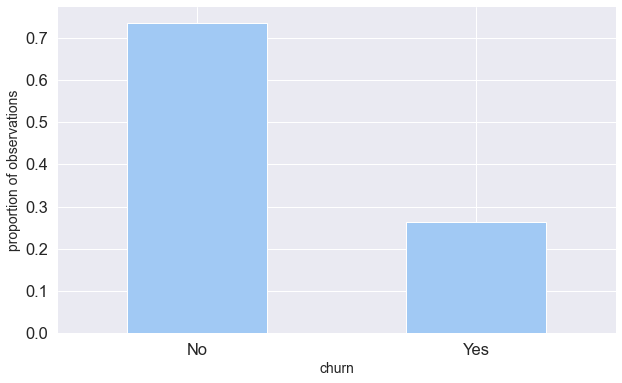

In [84]:
# create a figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# proportion of observation of each class
prop_response = data["Churn"].value_counts(normalize=True)

# create a bar plot showing the percentage of churn
prop_response.plot(kind="bar", ax=ax)

# set title and labels
# ax.set_title(
#   "Proportion of observations of the response variable", fontsize=18, loc="left")
ax.set_xlabel("churn", fontsize=14)
ax.set_ylabel("proportion of observations", fontsize=14)
ax.tick_params(rotation="auto")

# eliminate the frame from the plot
spine_names = ("top", "right", "bottom", "left")
for spine_name in spine_names:
    ax.spines[spine_name].set_visible(False)
plt.savefig("images/churn.pdf", bbox_inches="tight")

In [85]:
def percentage_stacked_plot(columns_to_plot, super_title):
    number_of_rows = math.ceil(len(columns_to_plot) / 2)

    fig = plt.figure(figsize=(28, 15))
    # fig.suptitle(super_title, fontsize=22, y=0.95)

    for index, column in enumerate(columns_to_plot, 1):
        ax = fig.add_subplot(number_of_rows, 2, index)
        prop_by_independent = pd.crosstab(data[column], data["Churn"]).apply(
            lambda x: x / x.sum() * 100, axis=1
        )
        prop_by_independent.plot(kind="bar", ax=ax, stacked=True, rot=0, fontsize=16)
        ax.legend(
            loc="upper right",
            bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
            title="Churn",
            fancybox=True,
        )

        ax.set_title(
            "Proportion of observations by " + column, fontsize=25, loc="center"
        )
        ax.tick_params(rotation="auto")
        plt.tight_layout()

In [86]:
def percentage_stacked_plot2(columns_to_plot, super_title, shape=(2, 2)):
    nrows, ncols = shape
    fig = plt.figure(figsize=(40, 20))
    # fig.suptitle(super_title, fontsize=22, y=0.95)

    for index, column in enumerate(columns_to_plot, 1):
        ax = fig.add_subplot(nrows, ncols, index)
        prop_by_independent = pd.crosstab(data[column], data["Churn"]).apply(
            lambda x: x / x.sum() * 100, axis=1
        )
        prop_by_independent.plot(kind="bar", ax=ax, stacked=True, rot=0, fontsize=16)
        ax.legend(
            loc="upper right",
            bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
            title="Churn",
            fancybox=True,
        )

        ax.set_title(
            "Proportion of observations by " + column, fontsize=25, loc="center"
        )
        ax.tick_params(rotation="auto")
        plt.tight_layout()

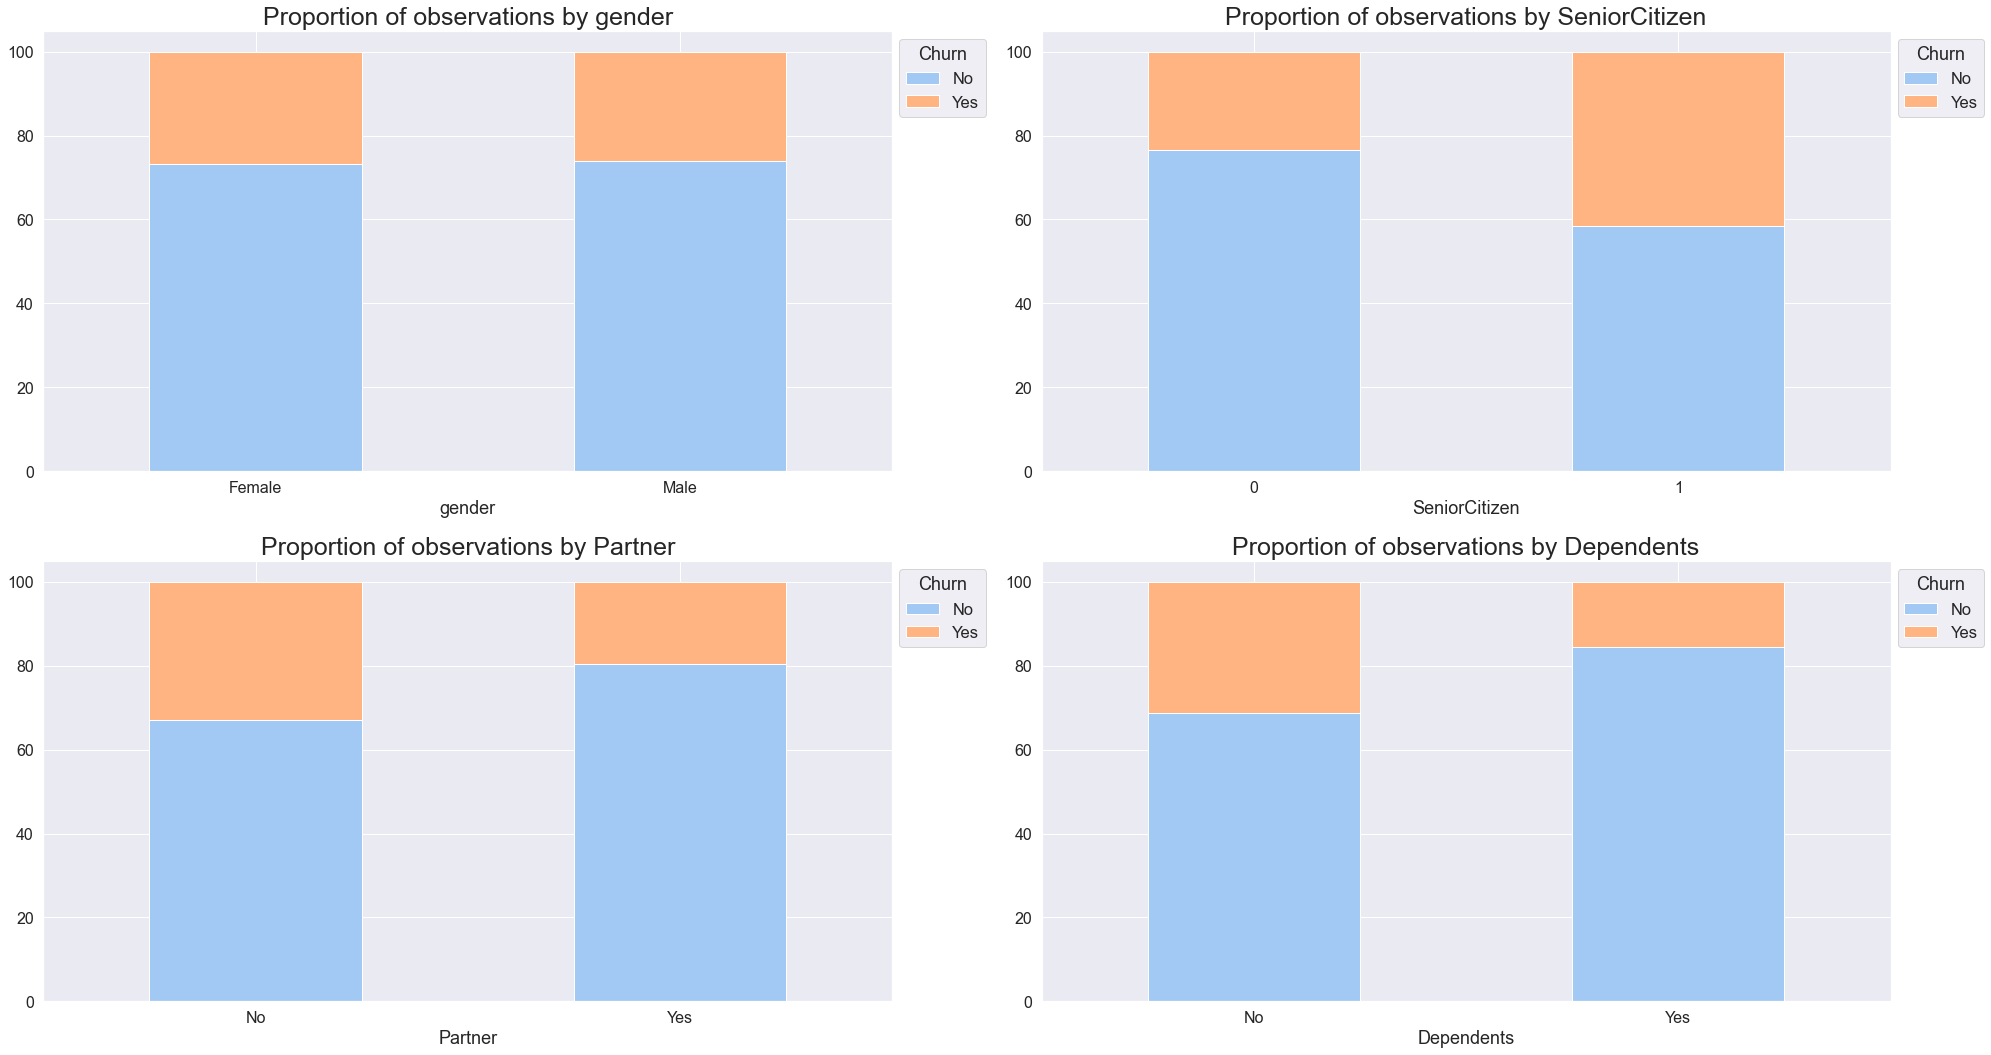

In [87]:
demographic_columns = ["gender", "SeniorCitizen", "Partner", "Dependents"]
percentage_stacked_plot(demographic_columns, "Demographic Information")
plt.savefig("images/demographic_columns.pdf")

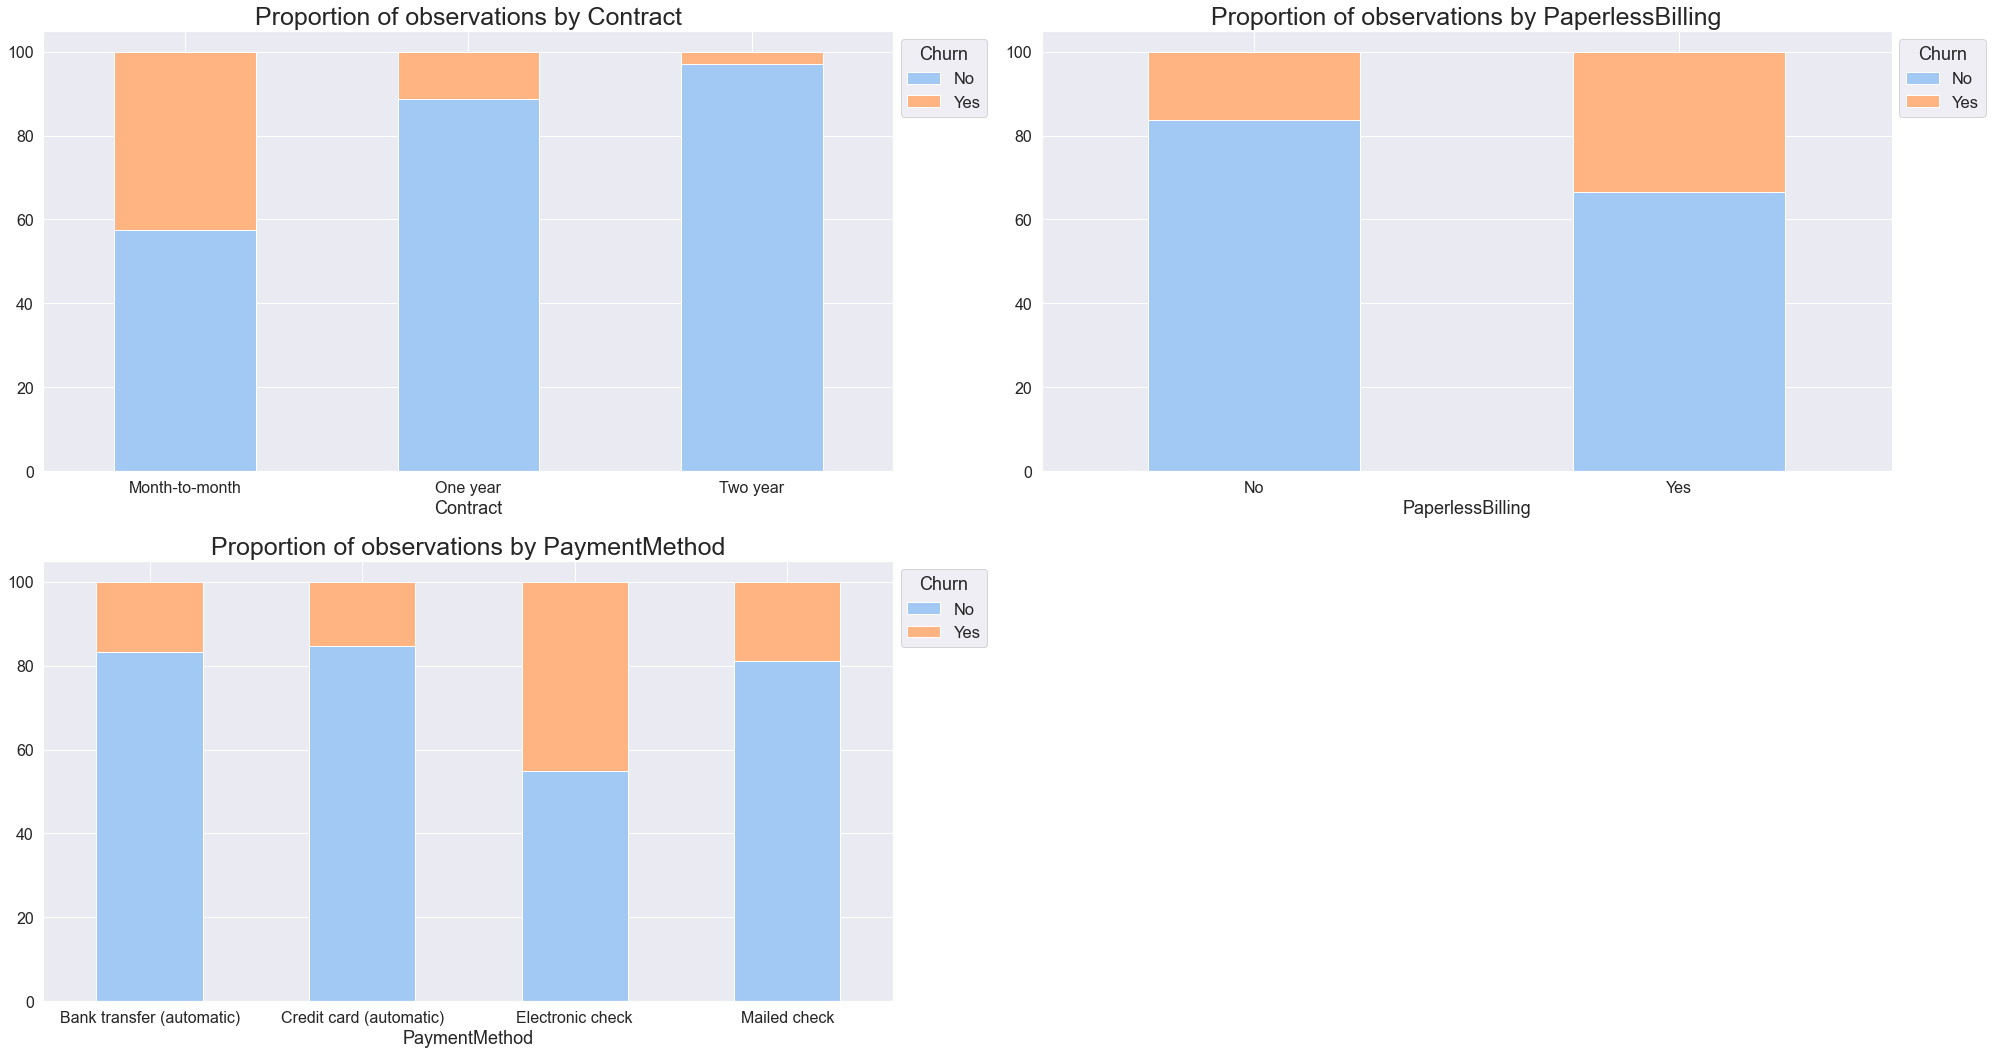

In [88]:
account_columns = ["Contract", "PaperlessBilling", "PaymentMethod"]
percentage_stacked_plot(account_columns, "Customer Account Information")
plt.savefig("images/account_columns.pdf")

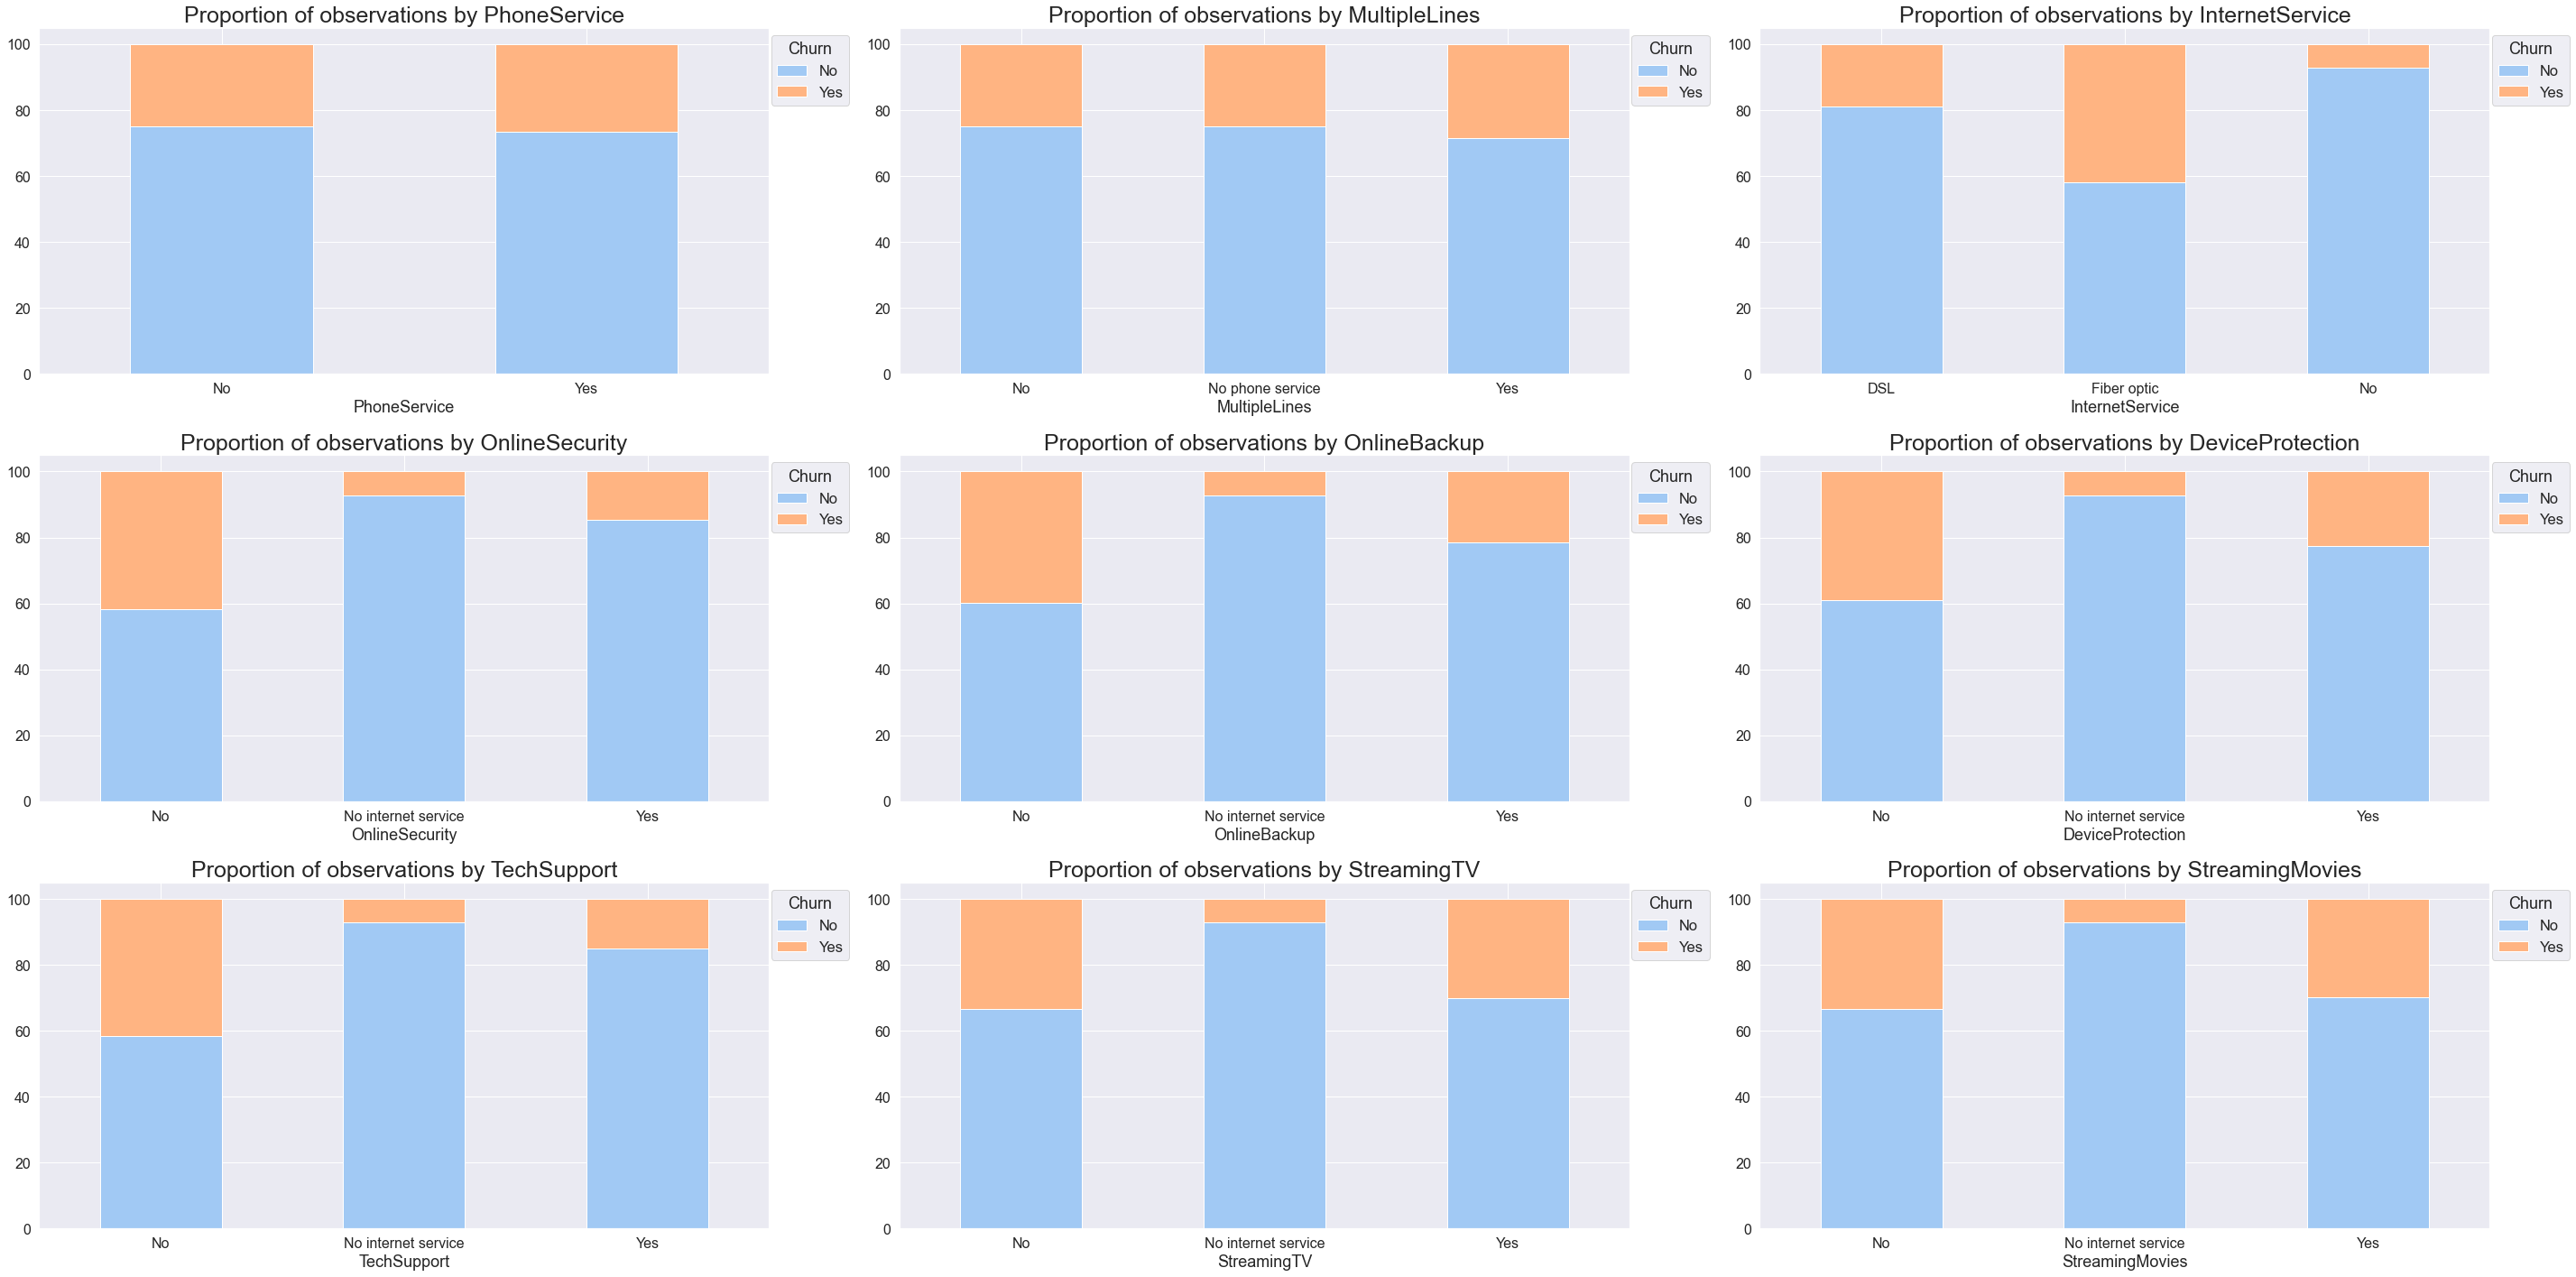

In [89]:
service_columnms = [
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
]


percentage_stacked_plot2(service_columnms, "", shape=(3, 3))
plt.savefig("images/service_columns.pdf")

In [90]:
# Calculate the product of 'tenure' and 'MonthlyCharges'
data["Tenure_MonthlyCharges"] = data["tenure"] * data["MonthlyCharges"]

# Calculate correlation between 'TotalCharges' and 'Tenure_MonthlyCharges'
correlation_totalcharges_tenure_monthly = (
    data["TotalCharges"].corr(data["Tenure_MonthlyCharges"]).round(4)
)

print(
    f"""Correlation between TotalCharges and product of 
    tenure and MonthlyCharges: {correlation_totalcharges_tenure_monthly}"""
)

Correlation between TotalCharges and product of 
    tenure and MonthlyCharges: 0.9996


In [91]:
from scipy.stats import ttest_ind

# Assuming you want to perform a t-test between 'TotalCharges' and 'tenure' * 'MonthlyCharges'
t_stat, p_value = ttest_ind(
    data["TotalCharges"].dropna(), (data["tenure"] * data["MonthlyCharges"]).dropna()
)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: 0.004012145265085251
P-Value: 0.9967988368276857


In [92]:
plt.rcParams["figure.figsize"] = [15, 6]

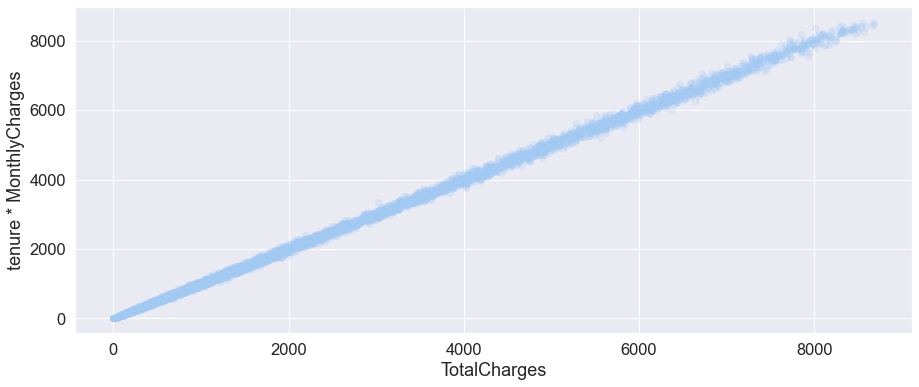

In [93]:
plt.scatter(data["TotalCharges"], data["tenure"] * data["MonthlyCharges"], alpha=0.2)
plt.xlabel("TotalCharges")
plt.ylabel("tenure * MonthlyCharges")
#  plt.title("TotalCharges vs (tenure * MonthlyCharges)")
plt.savefig("images/correlation_TotalCharges_Monthly_Charges.pdf")

In [94]:
product_tenure_monthly = (data["tenure"] * data["MonthlyCharges"]).sum()

total_charges_sum = data["TotalCharges"].sum()

print("Sum of product of tenure and MonthlyCharges:", product_tenure_monthly)
print("Sum of TotalCharges:", total_charges_sum)

correlation = data[["tenure", "MonthlyCharges", "TotalCharges"]].corr()
print("\nCorrelation Matrix:")
print(correlation)

correlation_coefficient = data["tenure"].corr(
    data["TotalCharges"] / data["MonthlyCharges"]
)
print(
    "\nCorrelation Coefficient between tenure and TotalCharges divided by MonthlyCharges:"
)
print(correlation_coefficient)

Sum of product of tenure and MonthlyCharges: 16054300.0
Sum of TotalCharges: 16055377.25

Correlation Matrix:
                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.245251      0.825595
MonthlyCharges  0.245251        1.000000      0.650653
TotalCharges    0.825595        0.650653      1.000000

Correlation Coefficient between tenure and TotalCharges divided by MonthlyCharges:
0.9989282367478423


In [95]:
data = data.drop(columns=["TotalCharges"], axis=1)

In [96]:
def dist_churn(dataset, columns_list, rows, cols):
    fig, axs = plt.subplots(rows, cols, figsize=(20, 6))
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.kdeplot(
            dataset[data][dataset["Churn"] == "No"],
            ax=axs[i],
            fill=True,
            alpha=0.5,
            linewidth=0,
        )
        sns.kdeplot(
            dataset[data][dataset["Churn"] == "Yes"],
            ax=axs[i],
            fill=True,
            alpha=0.6,
            linewidth=0,
        )

        axs[i].legend(
            ["No", "Yes"],
            loc="upper left",
            bbox_to_anchor=(1.02, 1),
            title="Churn",
            fancybox=True,
        )
        axs[i].set_title(f"Distribution of {data} by churn")
        axs[i].set_ylabel("Density")
        axs[i].set_xlabel(data)

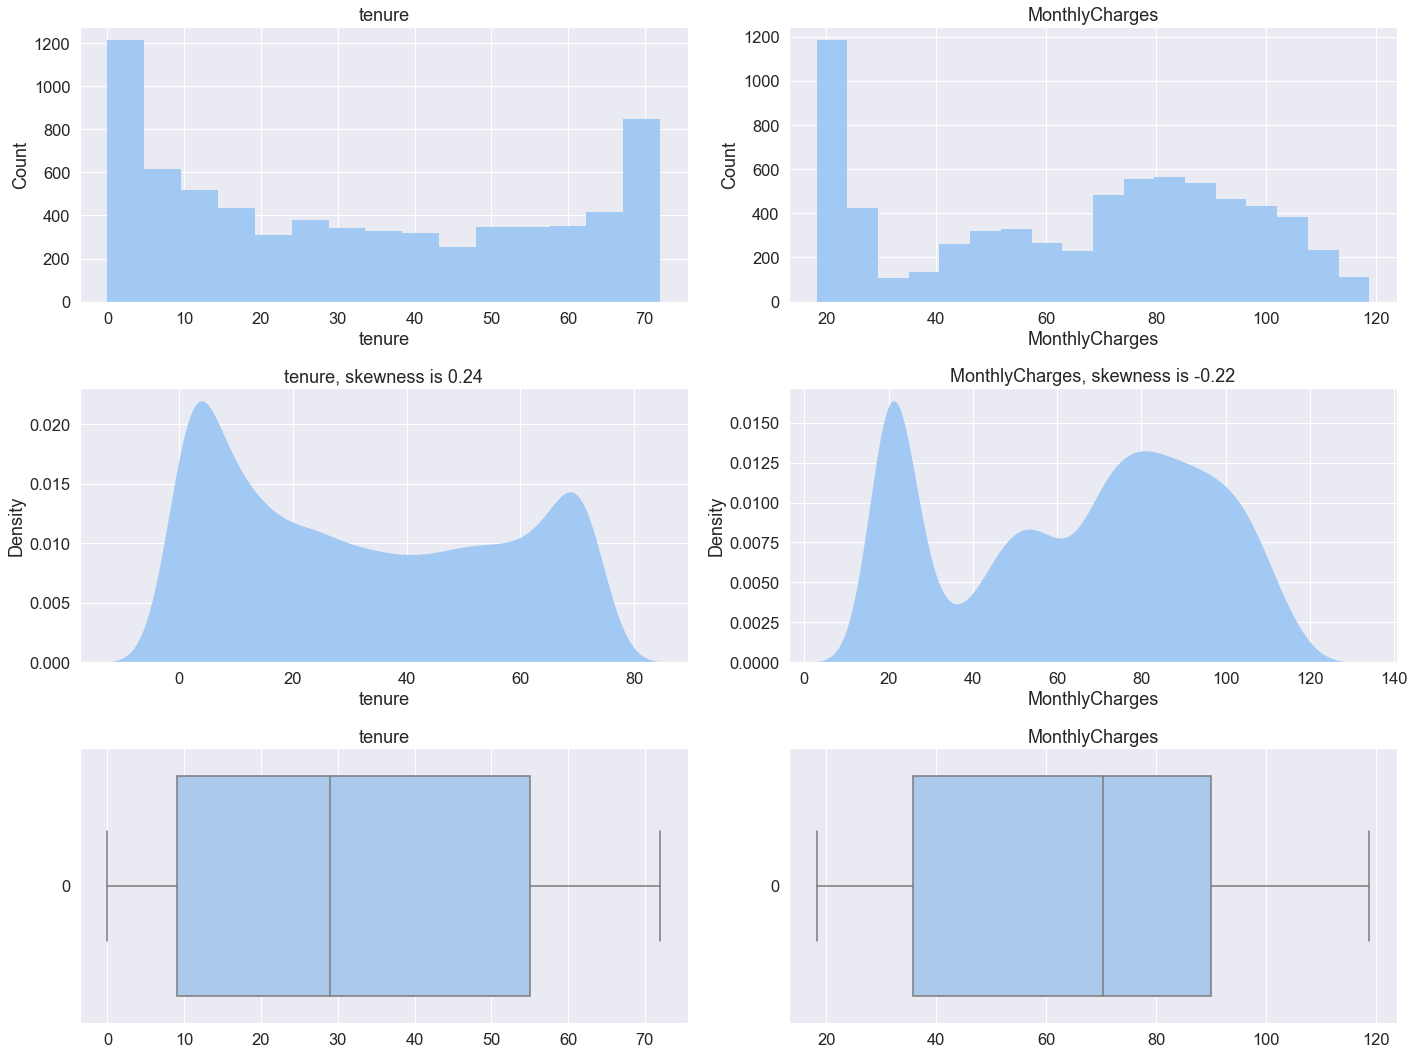

In [97]:
def histograms(dataset, columns_list, rows, cols, suptitle):
    for i, data in enumerate(columns_list):
        sns.histplot(dataset[data], ax=axs[0, i], fill=True, alpha=1, linewidth=0)
        axs[0, i].set_title(data)


def dist_numerical(dataset, columns_list, rows, cols, suptitle):
    for i, data in enumerate(columns_list):
        sns.kdeplot(dataset[data], ax=axs[1, i], fill=True, alpha=1, linewidth=0)
        axs[1, i].set_title(
            data
            + ", skewness is "
            + str(round(dataset[data].skew(axis=0, skipna=True), 2))
        )


def boxplots(dataset, columns_list, rows, cols, suptitle):
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient="h", ax=axs[2, i])
        axs[2, i].set_title(data)


fig, axs = plt.subplots(3, 2, figsize=(20, 15))

histograms(
    dataset=data,
    columns_list=["tenure", "MonthlyCharges"],
    rows=1,
    cols=3,
    suptitle="Histograms, Distribution Plots, and Boxplots for numerical features",
)

dist_numerical(
    dataset=data,
    columns_list=["tenure", "MonthlyCharges"],
    rows=1,
    cols=3,
    suptitle="",
)

boxplots(
    dataset=data,
    columns_list=["tenure", "MonthlyCharges"],
    rows=1,
    cols=3,
    suptitle="",
)

plt.tight_layout()
plt.savefig("images/combined_numerical_analysis.pdf")

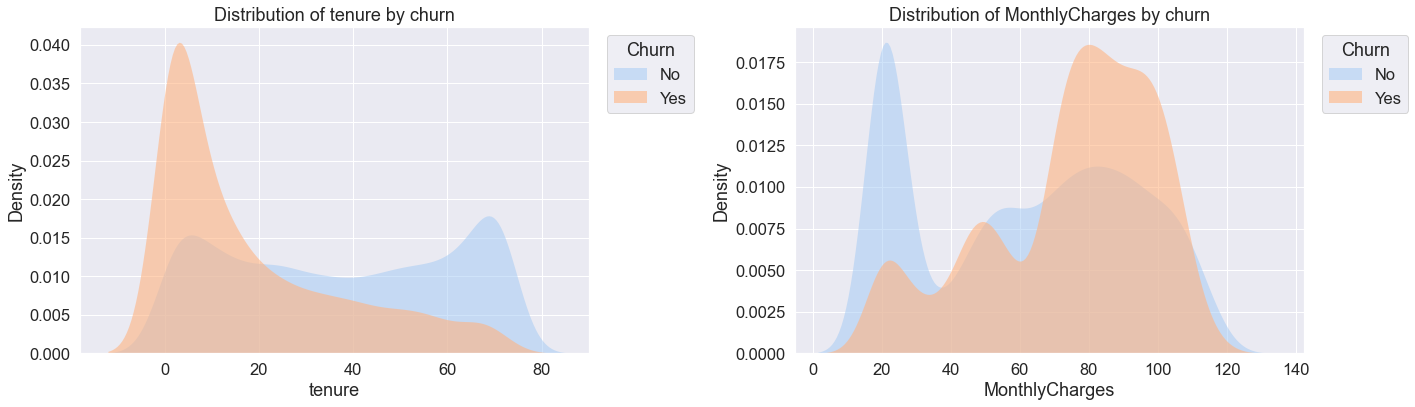

In [98]:
dist_churn(
    dataset=data,
    columns_list=["tenure", "MonthlyCharges"],
    rows=1,
    cols=2,
    #  suptitle="Distibution for each numerical feature by churn",
)
plt.tight_layout()
plt.savefig("images/distributions_churns.pdf")

In [99]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
data_copy = data.copy()
data_copy["tenure_group"] = pd.cut(
    data_copy.tenure, range(1, 80, 12), right=False, labels=labels
)
data_copy["tenure_group"].value_counts()

1 - 12     2153
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

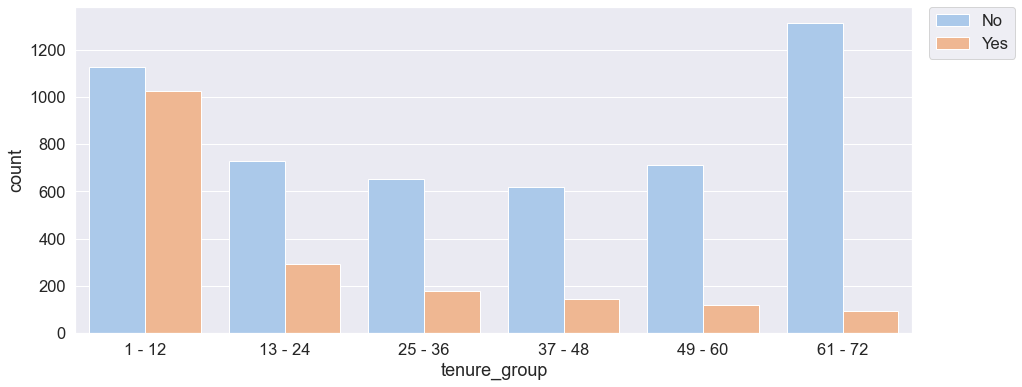

In [100]:
sns.countplot(data=data, x=data_copy["tenure_group"], hue="Churn")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.savefig("images/tenure_group.pdf")

In [101]:
plt.rcParams["figure.figsize"] = [15, 6]

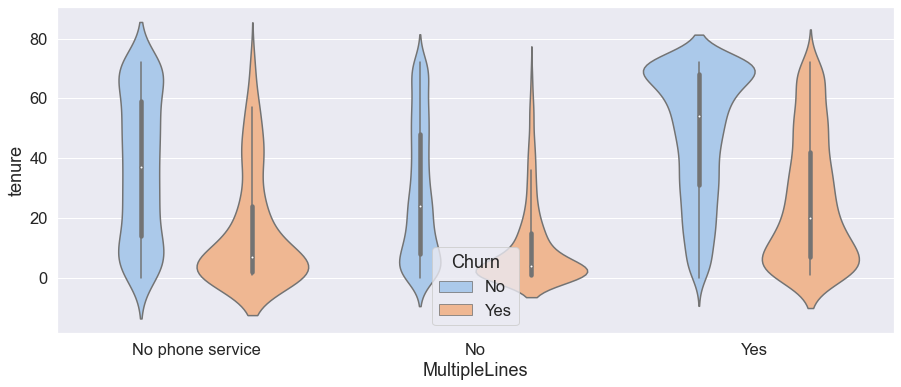

In [102]:
sns.violinplot(data=data, x="MultipleLines", y="tenure", hue="Churn")
plt.show()

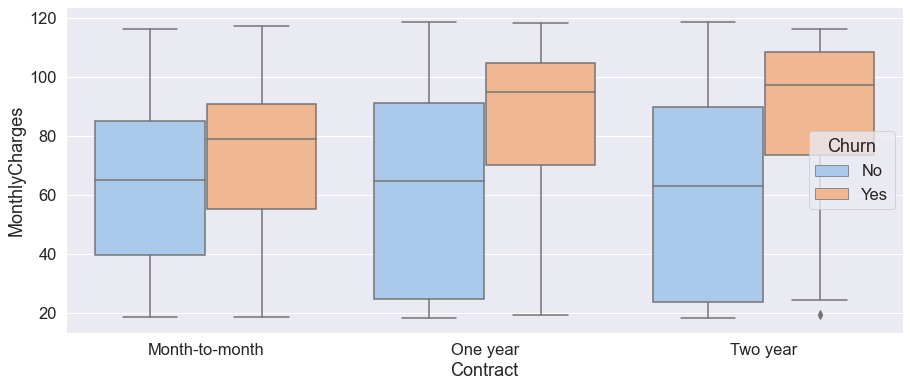

In [103]:
sns.boxplot(data=data, x="Contract", y="MonthlyCharges", hue="Churn")
plt.show()

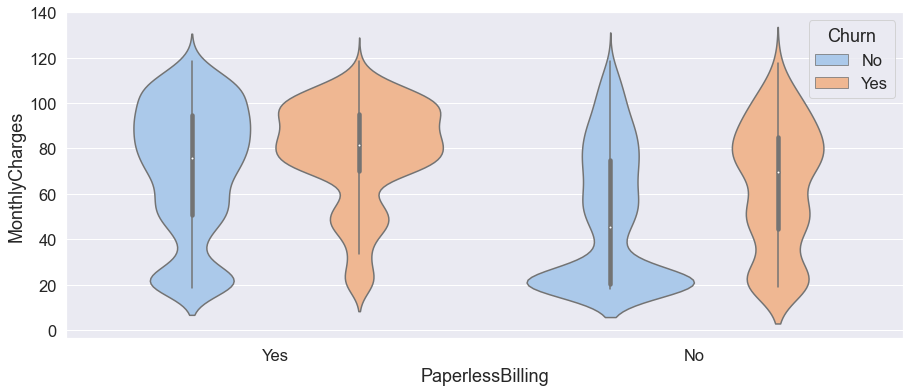

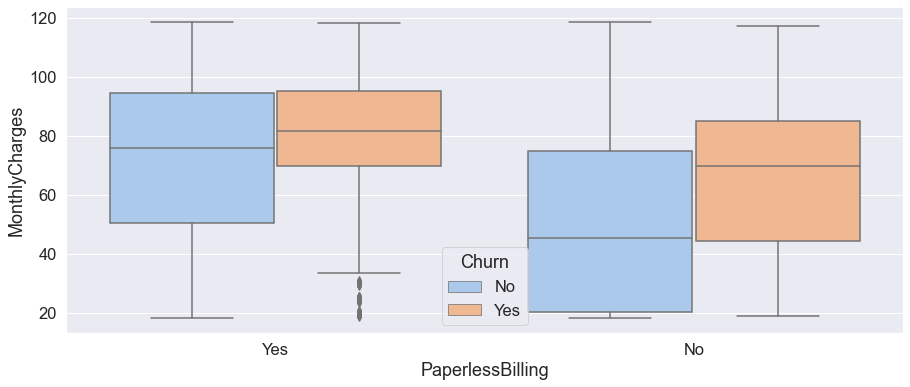

In [104]:
sns.violinplot(data=data, x="PaperlessBilling", y="MonthlyCharges", hue="Churn")
plt.show()
sns.boxplot(data=data, x="PaperlessBilling", y="MonthlyCharges", hue="Churn")
plt.show()

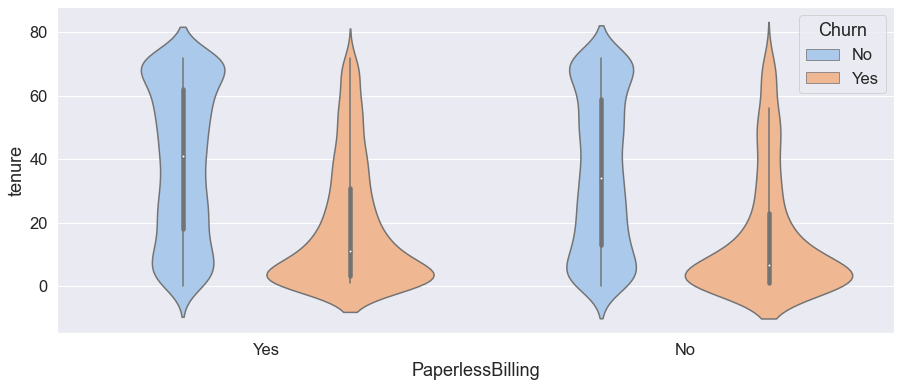

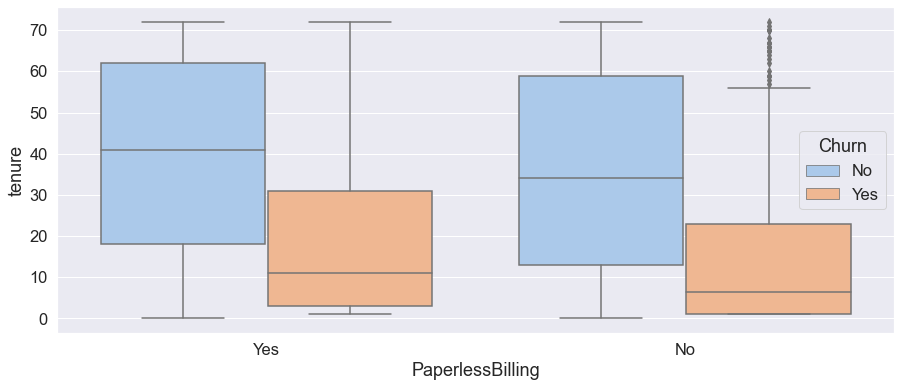

In [105]:
sns.violinplot(data=data, x="PaperlessBilling", y="tenure", hue="Churn")
plt.show()
sns.boxplot(data=data, x="PaperlessBilling", y="tenure", hue="Churn")
plt.show()

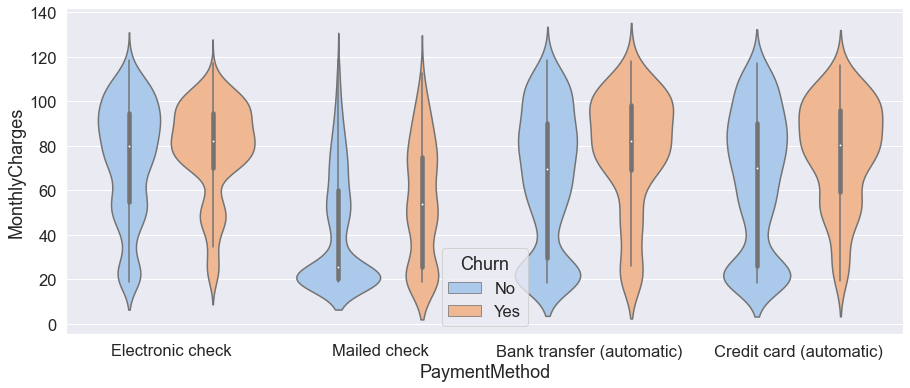

In [106]:
sns.violinplot(data=data, x="PaymentMethod", y="MonthlyCharges", hue="Churn")
plt.show()
# Ciutkę lepiej, ale też zbytnio nic nie daje

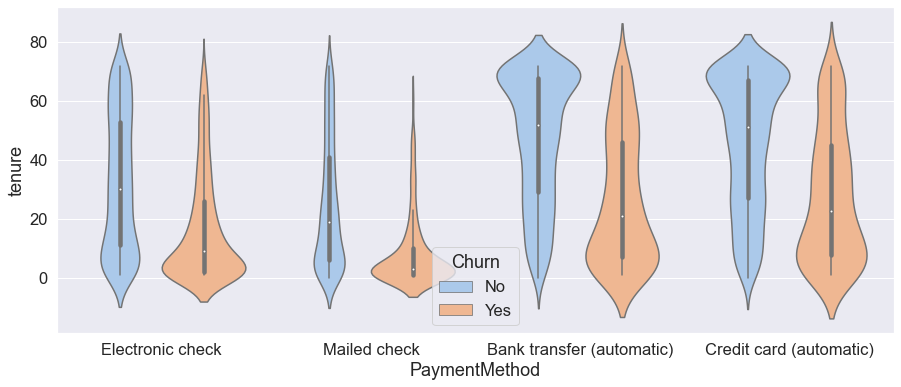

In [107]:
sns.violinplot(data=data, x="PaymentMethod", y="tenure", hue="Churn")
plt.show()
# Tutaj szczególnie dla churn=yes występuje fajna modalność

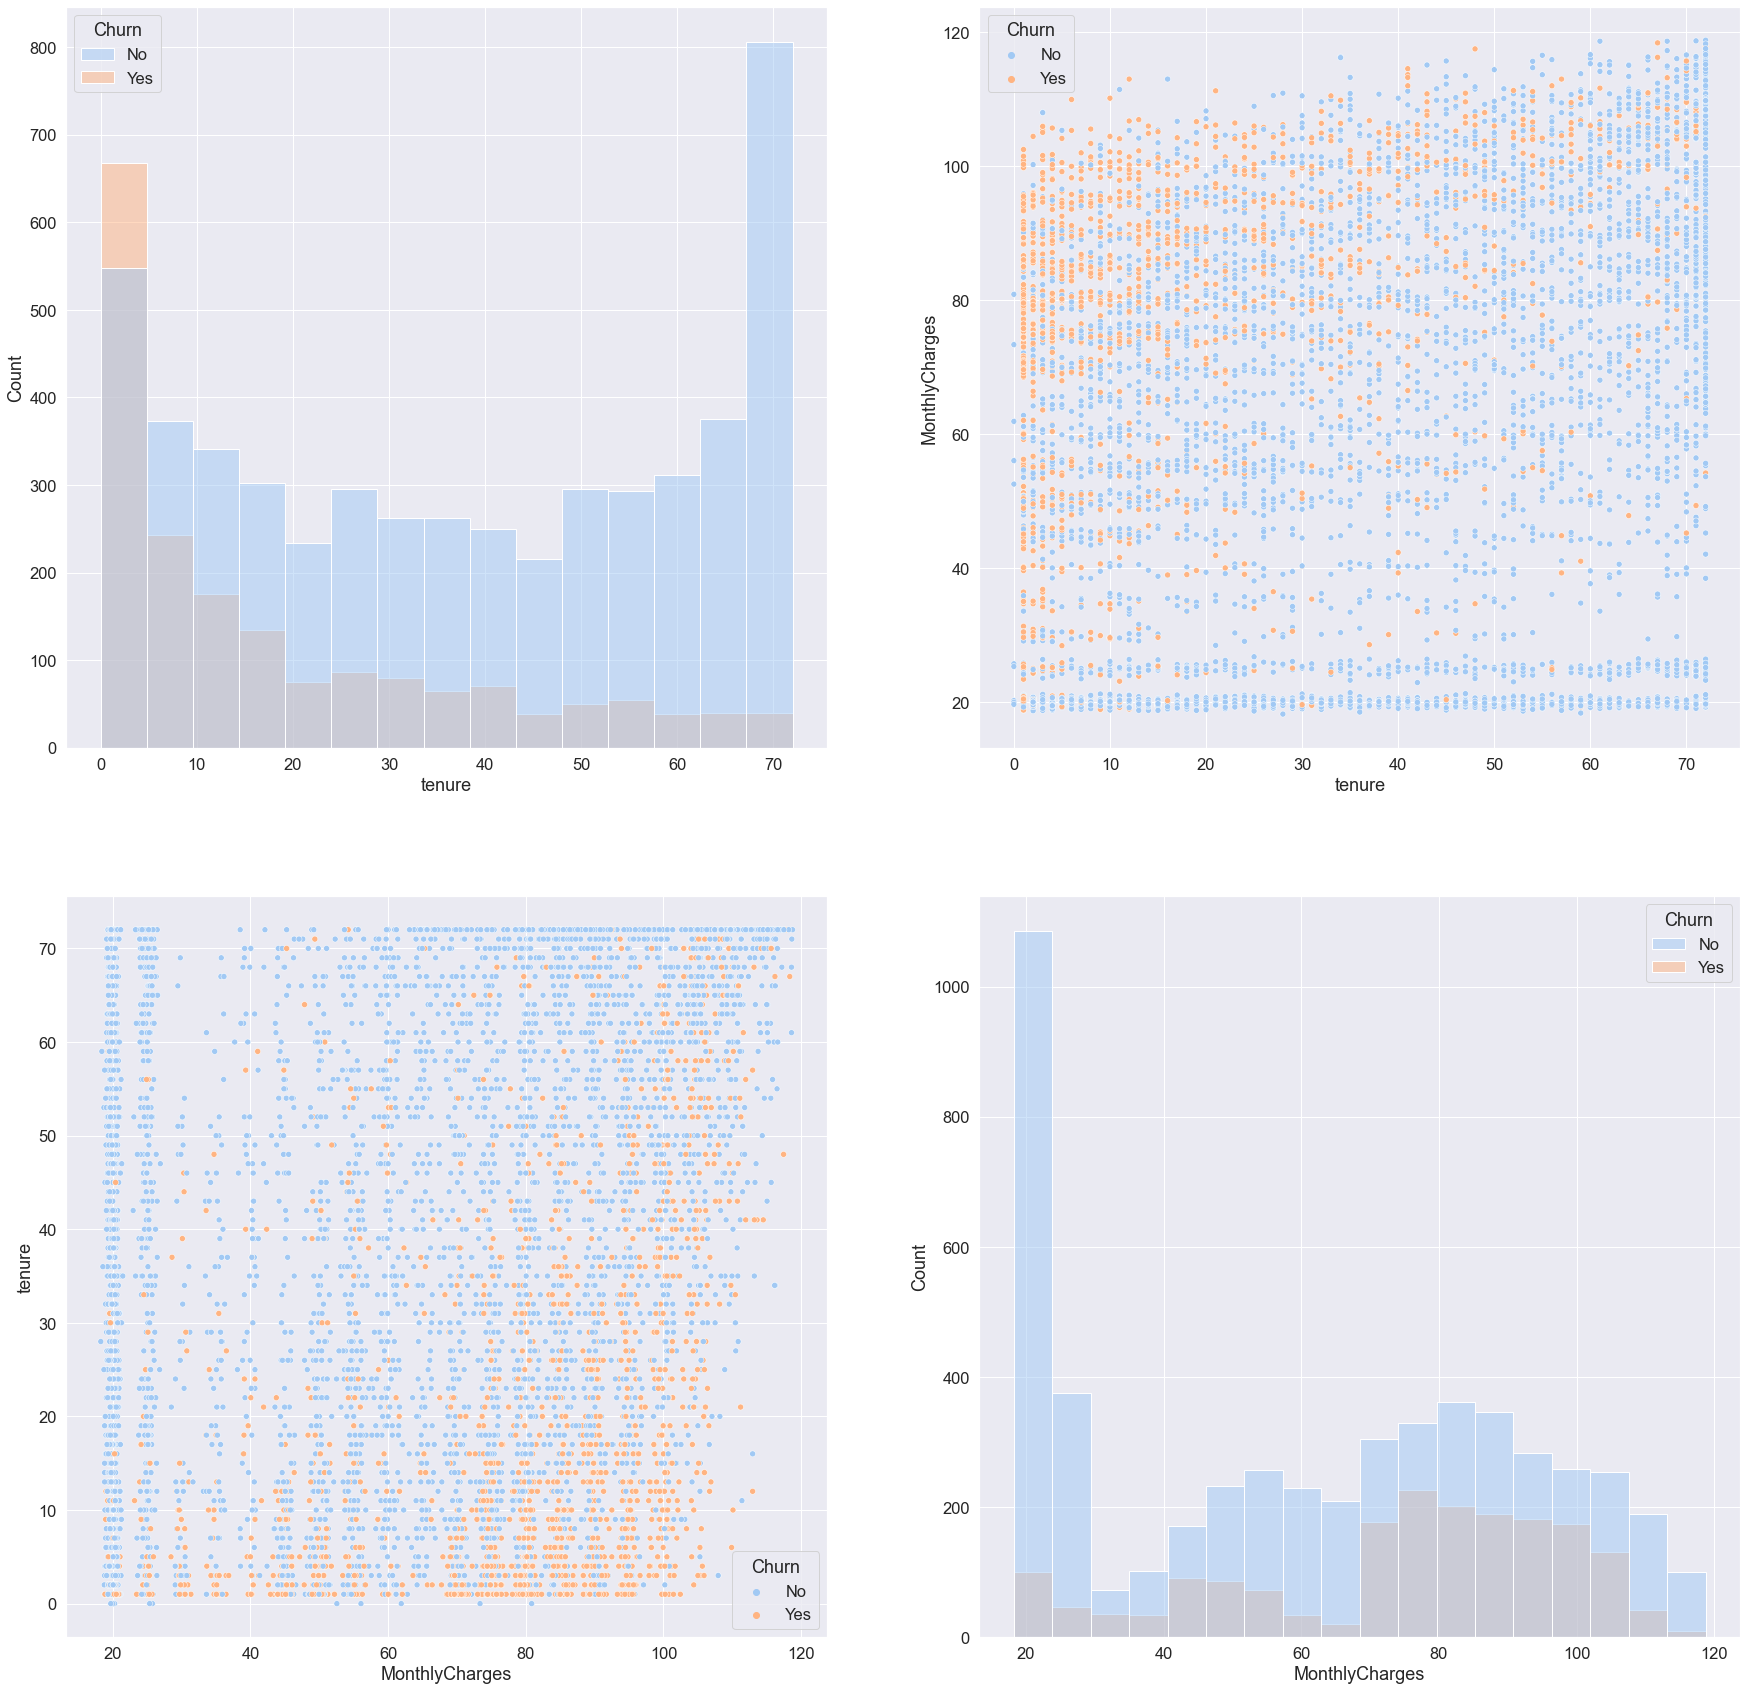

In [108]:
numeric_columns = ["tenure", "MonthlyCharges"]
numeric_columns_n = len(numeric_columns)
plt.figure(figsize=(30, 30))
for i, col in enumerate(numeric_columns):
    for j, row in enumerate(numeric_columns):
        plt.subplot(numeric_columns_n, numeric_columns_n, numeric_columns_n * i + j + 1)
        if col == row:
            sns.histplot(data=data, x=col, hue="Churn")
        else:
            sns.scatterplot(data=data, x=col, y=row, hue="Churn")
plt.savefig("images/numeric_features.pdf")

plt.show()

In [109]:
data[["tenure", "MonthlyCharges"]].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7021.0,32.469449,24.534965,0.00,9.00,29.0,55.0,72.00
MonthlyCharges,7021.0,64.851894,30.069001,18.25,35.75,70.4,89.9,118.75


In [110]:
summary_by_churn = data.groupby("Churn")[["tenure", "MonthlyCharges"]].describe().T
print(summary_by_churn)

Churn                          No          Yes
tenure         count  5164.000000  1857.000000
               mean     37.640782    18.088853
               std      24.083296    19.546231
               min       0.000000     1.000000
               25%      15.000000     2.000000
               50%      38.000000    10.000000
               75%      61.000000    29.000000
               max      72.000000    72.000000
MonthlyCharges count  5164.000000  1857.000000
               mean     61.344878    74.604308
               std      31.069815    24.597504
               min      18.250000    18.850000
               25%      25.100000    56.500000
               50%      64.500000    79.700000
               75%      88.462500    94.250000
               max     118.750000   118.350000


In [111]:
feature_columns = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]

feature_importance = {}

for feature in feature_columns:
    contingency_table = pd.crosstab(data[feature], data["Churn"])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    feature_importance[feature] = p
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1])
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

Contract: 6.442284610021268e-257
OnlineSecurity: 1.329226523787891e-184
TechSupport: 7.146857715828324e-180
InternetService: 1.0857790034735195e-159
PaymentMethod: 3.0267752570875056e-139
OnlineBackup: 8.614898409283198e-131
DeviceProtection: 1.9555513236078665e-121
StreamingMovies: 2.750289622934079e-82
StreamingTV: 5.469454144000632e-82
PaperlessBilling: 2.1518977990247168e-57
Dependents: 1.5995676694072134e-42
SeniorCitizen: 8.934159012714662e-37
Partner: 1.0999615978939857e-35
MultipleLines: 0.0020685599531309134
PhoneService: 0.3664940064978197
gender: 0.4794615390898278


In [112]:
from statsmodels.graphics.mosaicplot import mosaic

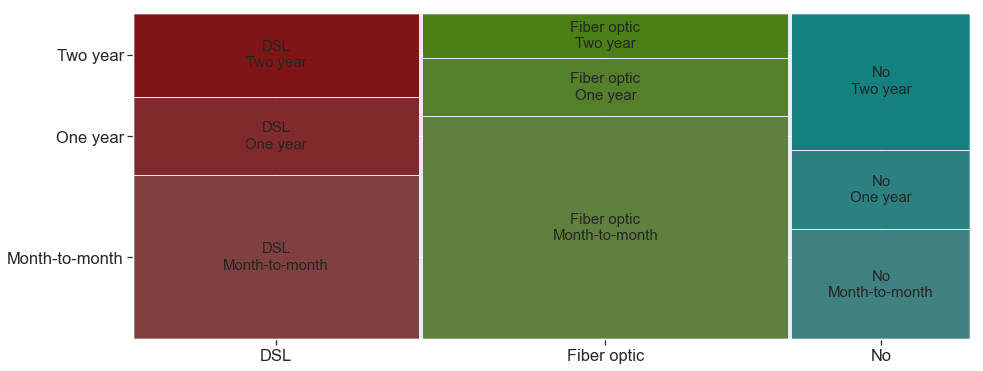

In [113]:
mosaic(data, ["InternetService", "Contract"])
plt.show()

Testy

In [114]:
polytomous_cols = [
    "TechSupport",
    "StreamingMovies",
    "DeviceProtection",
    "MultipleLines",
    "Contract",
    "InternetService",
    "OnlineSecurity",
    "StreamingTV",
    "PaymentMethod",
    "OnlineBackup",
]

In [115]:
def cramers_v(x, y):
    """calculate Cramers V statistic for categorial-categorial association.
    uses correction from Bergsma and Wicher,
    Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [116]:
print("**Correlation Between Polytomous Features with Target : Churn**")
cramer_v_val_dict = {}

for col in polytomous_cols:
    cramer_v_val_dict[col] = cramers_v(data[col], data["Churn"])

cramer_v_val_dict_sorted = sorted(
    cramer_v_val_dict.items(), key=lambda x: x[1], reverse=True
)

for k, v in cramer_v_val_dict_sorted:
    print(f"{k} {v}")

**Correlation Between Polytomous Features with Target : Churn**
Contract 0.4096073288722002
OnlineSecurity 0.3468995462124089
TechSupport 0.34239749224389554
InternetService 0.32248527298610735
PaymentMethod 0.3021580360383906
OnlineBackup 0.29161355692839197
DeviceProtection 0.2808929530471903
StreamingMovies 0.23069332681659863
StreamingTV 0.23026843008753956
MultipleLines 0.038418746327826526


In [130]:
df_dummies_sorted

Churn                                      1.000000
Contract_Month-to-month                    0.404884
OnlineSecurity_No                          0.342255
TechSupport_No                             0.336861
InternetService_Fiber optic                0.308170
PaymentMethod_Electronic check             0.301544
OnlineBackup_No                            0.267049
DeviceProtection_No                        0.251465
MonthlyCharges                             0.194508
PaperlessBilling_Yes                       0.190891
Dependents_No                              0.163459
SeniorCitizen                              0.151619
Partner_No                                 0.149135
StreamingMovies_No                         0.129117
StreamingTV_No                             0.127197
StreamingTV_Yes                            0.065032
StreamingMovies_Yes                        0.063192
MultipleLines_Yes                          0.041958
PhoneService_Yes                           0.011323
gender_Femal

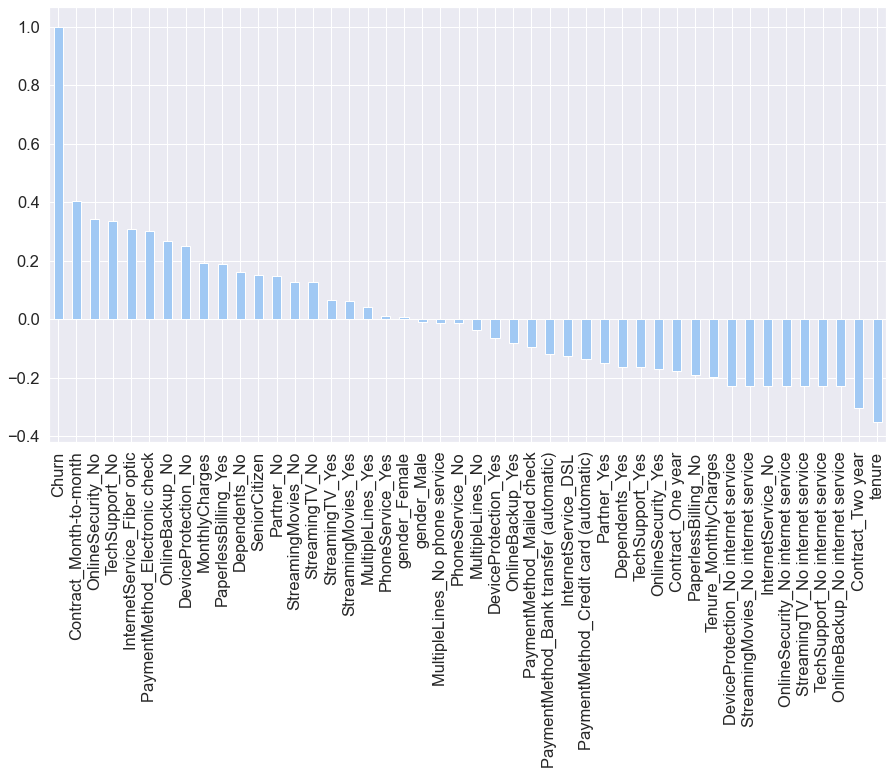

In [117]:
fig, ax = plt.subplots(figsize=(15, 8))
df = data.copy()
df["Churn"].replace(to_replace="Yes", value=1, inplace=True)
df["Churn"].replace(to_replace="No", value=0, inplace=True)
df_dummies = pd.get_dummies(df)

df_dummies_sorted = df_dummies.corr()["Churn"].sort_values(ascending=False)
df_dummies_sorted_desc = df_dummies.corr()["Churn"].sort_values(ascending=True)

df_dummies_sorted.plot(kind="bar", label=True)
plt.savefig("images/correlation.pdf")

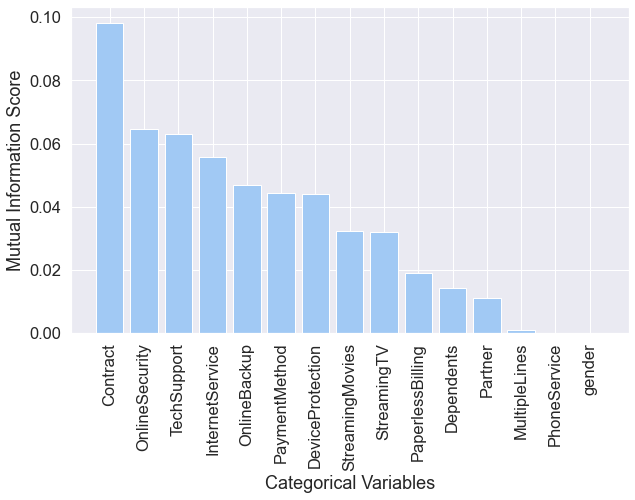

In [119]:
from sklearn.metrics import mutual_info_score


# function that computes the mutual infomation score between a categorical serie and the column Churn
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, data.Churn)


# select categorial variables excluding the response variable
categorical_variables = data.select_dtypes(include=object).drop("Churn", axis=1)

# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(
    compute_mutual_information
).sort_values(ascending=False)

# visualize feature importance
feature_importance
# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance.index, feature_importance.values)
plt.xlabel("Categorical Variables")
plt.ylabel("Mutual Information Score")
# plt.title("Feature Importance")
plt.xticks(rotation=90)
plt.savefig("images/feature_importance.pdf")
plt.show()

In [118]:
feature_importance

{'gender': 0.4794615390898278,
 'SeniorCitizen': 8.934159012714662e-37,
 'Partner': 1.0999615978939857e-35,
 'Dependents': 1.5995676694072134e-42,
 'PhoneService': 0.3664940064978197,
 'MultipleLines': 0.0020685599531309134,
 'InternetService': 1.0857790034735195e-159,
 'OnlineSecurity': 1.329226523787891e-184,
 'OnlineBackup': 8.614898409283198e-131,
 'DeviceProtection': 1.9555513236078665e-121,
 'TechSupport': 7.146857715828324e-180,
 'StreamingTV': 5.469454144000632e-82,
 'StreamingMovies': 2.750289622934079e-82,
 'Contract': 6.442284610021268e-257,
 'PaperlessBilling': 2.1518977990247168e-57,
 'PaymentMethod': 3.0267752570875056e-139}

## Feature selection

In [120]:
# We also decided not to use gender, PhoneService and multipleLines
data = data.drop(columns=["PhoneService", "gender", "MultipleLines"])

In [121]:
Data = data.copy()
Data.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,Tenure_MonthlyCharges
0,0,Yes,No,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No,29.85
1,0,No,No,34,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No,1936.30
2,0,No,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes,107.70
3,0,No,No,45,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No,1903.50
4,0,No,No,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes,141.40


In [122]:
nominal_features = ("PaperlessBilling", "Dependents", "Partner", "Churn")
for feature in nominal_features:
    Data[feature] = Data[feature].map({"Yes": 1, "No": 0})

In [123]:
one_hot_encoded_data = pd.get_dummies(
    data,
    columns=[
        "InternetService",
        "OnlineSecurity",
        "OnlineBackup",
        "DeviceProtection",
        "TechSupport",
        "StreamingTV",
        "StreamingMovies",
        "Contract",
        "PaymentMethod",
    ],
)

# No internet service column has the same values (we checked it before) for OnlineSecurity, OnlineBackup, DeviceProtection,
# TechSupport, StreamingTV and StreamingMovies


one_hot_encoded_data.drop(
    columns=[
        "OnlineSecurity_No internet service",
        "OnlineBackup_No internet service",
        "DeviceProtection_No internet service",
        "TechSupport_No internet service",
        "StreamingTV_No internet service",
        "StreamingMovies_No internet service",
    ],
    inplace=True,
)

In [124]:
data.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'Churn', 'Tenure_MonthlyCharges'],
      dtype='object')

In [125]:
Data = data.copy()
Data.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,Tenure_MonthlyCharges
0,0,Yes,No,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No,29.85
1,0,No,No,34,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No,1936.30
2,0,No,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes,107.70
3,0,No,No,45,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No,1903.50
4,0,No,No,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes,141.40


In [126]:
nominal_features = ("PaperlessBilling", "Dependents", "Partner", "Churn")
for feature in nominal_features:
    Data[feature] = Data[feature].map({"Yes": 1, "No": 0})

In [127]:
from sklearn.model_selection import train_test_split

X = one_hot_encoded_data.drop(columns="Churn")
y = one_hot_encoded_data.Churn

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [128]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
# criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
RandomForest = RandomForestClassifier().fit(X_train, y_train)

# print(RandomForest.score(X_test, y_test))
from sklearn.metrics import classification_report

print(classification_report(y_test, RandomForest.predict(X_test)))

ValueError: could not convert string to float: 'No'

In [ ]:
importances = RandomForest.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)
forest_importances.plot.bar()

NameError: name 'RandomForest' is not defined

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

n_values = range(1, 100)

best_n = None
best_accuracy = 0

for n in n_values:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = knn.score(X_test, y_test)
    if accuracy > best_accuracy:
        best_n = n
        best_accuracy = accuracy
print("Best n:", best_n)
print("Best accuracy:", best_accuracy)

NameError: name 'X_train' is not defined

In [ ]:
plt.rcParams["figure.figsize"] = [15, 6]

In [ ]:
n_values = range(1, 100)

accuracy_values = []

for n in n_values:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

plt.plot(n_values, accuracy_values)
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.title("Accuracy vs n_neighbors")
plt.show()

NameError: name 'X_train' is not defined

In [ ]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1053
           1       0.64      0.37      0.47       352

    accuracy                           0.79      1405
   macro avg       0.73      0.65      0.67      1405
weighted avg       0.77      0.79      0.77      1405



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[965  88]
 [215 137]]


In [ ]:
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

lda_predictions = lda.predict(X_test)
qda_predictions = qda.predict(X_test)

print("Linear Discriminant Analysis (LDA) Results:")
print(classification_report(y_test, lda_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lda_predictions))

print("\nQuadratic Discriminant Analysis (QDA) Results:")
print(classification_report(y_test, qda_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, qda_predictions))

Linear Discriminant Analysis (LDA) Results:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1053
           1       0.59      0.57      0.58       352

    accuracy                           0.79      1405
   macro avg       0.72      0.72      0.72      1405
weighted avg       0.79      0.79      0.79      1405

Confusion Matrix:
[[913 140]
 [152 200]]

Quadratic Discriminant Analysis (QDA) Results:
              precision    recall  f1-score   support

           0       0.93      0.66      0.77      1053
           1       0.45      0.85      0.59       352

    accuracy                           0.70      1405
   macro avg       0.69      0.75      0.68      1405
weighted avg       0.81      0.70      0.72      1405

Confusion Matrix:
[[691 362]
 [ 53 299]]


c:\Users\oliwi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1053
           1       0.46      0.50      0.48       352

    accuracy                           0.73      1405
   macro avg       0.64      0.65      0.65      1405
weighted avg       0.74      0.73      0.73      1405



In [ ]:
knn_train_predictions = knn.predict(X_train)
knn_train_accuracy = accuracy_score(y_train, knn_train_predictions)

knn_test_predictions = knn.predict(X_test)
knn_test_accuracy = accuracy_score(y_test, knn_test_predictions)

knn_train_error = 1 - knn_train_accuracy
knn_test_error = 1 - knn_test_accuracy

qda_train_predictions = qda.predict(X_train)
qda_train_accuracy = accuracy_score(y_train, qda_train_predictions)

qda_test_predictions = qda.predict(X_test)
qda_test_accuracy = accuracy_score(y_test, qda_test_predictions)

qda_train_error = 1 - qda_train_accuracy
qda_test_error = 1 - qda_test_accuracy

lda_train_predictions = lda.predict(X_train)
lda_train_accuracy = accuracy_score(y_train, lda_train_predictions)

lda_test_predictions = lda.predict(X_test)
lda_test_accuracy = accuracy_score(y_test, lda_test_predictions)

lda_train_error = 1 - lda_train_accuracy
lda_test_error = 1 - lda_test_accuracy

decision_tree_train_predictions = decision_tree.predict(X_train)
decision_tree_train_accuracy = accuracy_score(y_train, decision_tree_train_predictions)

decision_tree_test_predictions = decision_tree.predict(X_test)
decision_tree_test_accuracy = accuracy_score(y_test, decision_tree_test_predictions)

decision_tree_train_error = 1 - decision_tree_train_accuracy
decision_tree_test_error = 1 - decision_tree_test_accuracy

print("Classification Error:")
print("KNN - Training Set:", knn_train_error)
print("KNN - Test Set:", knn_test_error)
print("QDA - Training Set:", qda_train_error)
print("QDA - Test Set:", qda_test_error)
print("LDA - Training Set:", lda_train_error)
print("LDA - Test Set:", lda_test_error)
print("Decision Tree - Training Set:", decision_tree_train_error)
print("Decision Tree - Test Set:", decision_tree_test_error)

Classification Error:
KNN - Training Set: 0.2040598290598291
KNN - Test Set: 0.21565836298932384
QDA - Training Set: 0.2843660968660968
QDA - Test Set: 0.2953736654804271
LDA - Training Set: 0.1996082621082621
LDA - Test Set: 0.2078291814946619
Decision Tree - Training Set: 0.003383190883190834
Decision Tree - Test Set: 0.2661921708185053


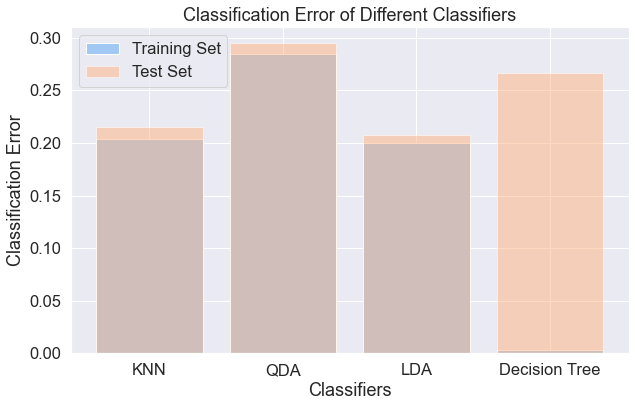

In [ ]:
classifiers = ["KNN", "QDA", "LDA", "Decision Tree"]
train_errors = [
    knn_train_error,
    qda_train_error,
    lda_train_error,
    decision_tree_train_error,
]
test_errors = [knn_test_error, qda_test_error, lda_test_error, decision_tree_test_error]

plt.figure(figsize=(10, 6))
plt.bar(classifiers, train_errors, label="Training Set", alpha=1)
plt.bar(classifiers, test_errors, label="Test Set", alpha=0.5)
plt.xlabel("Classifiers")
plt.ylabel("Classification Error")
plt.title("Classification Error of Different Classifiers")
plt.legend()
plt.show()

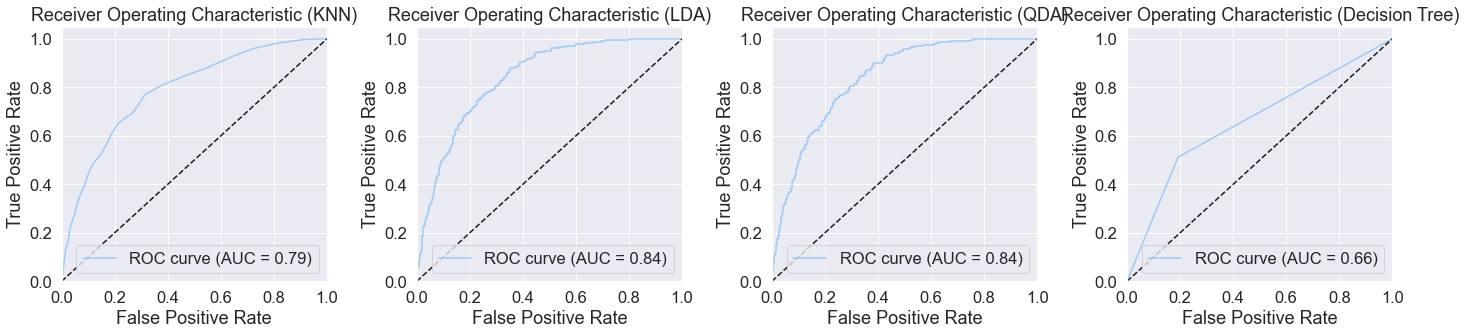

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]
y_pred_prob_lda = lda.predict_proba(X_test)[:, 1]
y_pred_prob_qda = qda.predict_proba(X_test)[:, 1]
y_pred_prob_dt = decision_tree.predict_proba(X_test)[:, 1]

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, y_pred_prob_lda)
fpr_qda, tpr_qda, thresholds_qda = roc_curve(y_test, y_pred_prob_qda)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)

auc_knn = roc_auc_score(y_test, y_pred_prob_knn)
auc_lda = roc_auc_score(y_test, y_pred_prob_lda)
auc_qda = roc_auc_score(y_test, y_pred_prob_qda)
auc_dt = roc_auc_score(y_test, y_pred_prob_dt)

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].plot(fpr_knn, tpr_knn, label="ROC curve (AUC = %0.2f)" % auc_knn)
axs[0].plot([0, 1], [0, 1], "k--")  # Random guess line
axs[0].set_xlim([0.0, 1.0])
axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel("False Positive Rate")
axs[0].set_ylabel("True Positive Rate")
axs[0].set_title("Receiver Operating Characteristic (KNN)")
axs[0].legend(loc="lower right")

axs[1].plot(fpr_lda, tpr_lda, label="ROC curve (AUC = %0.2f)" % auc_lda)
axs[1].plot([0, 1], [0, 1], "k--")  # Random guess line
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel("False Positive Rate")
axs[1].set_ylabel("True Positive Rate")
axs[1].set_title("Receiver Operating Characteristic (LDA)")
axs[1].legend(loc="lower right")

axs[2].plot(fpr_qda, tpr_qda, label="ROC curve (AUC = %0.2f)" % auc_qda)
axs[2].plot([0, 1], [0, 1], "k--")  # Random guess line
axs[2].set_xlim([0.0, 1.0])
axs[2].set_ylim([0.0, 1.05])
axs[2].set_xlabel("False Positive Rate")
axs[2].set_ylabel("True Positive Rate")
axs[2].set_title("Receiver Operating Characteristic (QDA)")
axs[2].legend(loc="lower right")

axs[3].plot(fpr_dt, tpr_dt, label="ROC curve (AUC = %0.2f)" % auc_dt)
axs[3].plot([0, 1], [0, 1], "k--")  # Random guess line
axs[3].set_xlim([0.0, 1.0])
axs[3].set_ylim([0.0, 1.05])
axs[3].set_xlabel("False Positive Rate")
axs[3].set_ylabel("True Positive Rate")
axs[3].set_title("Receiver Operating Characteristic (Decision Tree)")
axs[3].legend(loc="lower right")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds for KNN
knn_scores = cross_val_score(knn, X, y, cv=5)

for i, score in enumerate(knn_scores):
    print(f"KNN - Fold {i+1}: {score}")

knn_mean_score = knn_scores.mean()
print(f"KNN - Mean Accuracy: {knn_mean_score}")

lda_scores = cross_val_score(lda, X, y, cv=5)
for i, score in enumerate(lda_scores):
    print(f"LDA - Fold {i+1}: {score}")

lda_mean_score = lda_scores.mean()
print(f"LDA - Mean Accuracy: {lda_mean_score}")

qda_scores = cross_val_score(qda, X, y, cv=5)
for i, score in enumerate(qda_scores):
    print(f"QDA - Fold {i+1}: {score}")

qda_mean_score = qda_scores.mean()
print(f"QDA - Mean Accuracy: {qda_mean_score}")

decision_tree_scores = cross_val_score(decision_tree, X, y, cv=5)
for i, score in enumerate(decision_tree_scores):
    print(f"Decision Tree - Fold {i+1}: {score}")

decision_tree_mean_score = decision_tree_scores.mean()
print(f"Decision Tree - Mean Accuracy: {decision_tree_mean_score}")

KNN - Fold 1: 0.79644128113879
KNN - Fold 2: 0.7792022792022792
KNN - Fold 3: 0.7727920227920227
KNN - Fold 4: 0.7856125356125356
KNN - Fold 5: 0.7870370370370371
KNN - Mean Accuracy: 0.784217031156533
LDA - Fold 1: 0.8
LDA - Fold 2: 0.8062678062678063
LDA - Fold 3: 0.7799145299145299
LDA - Fold 4: 0.7991452991452992
LDA - Fold 5: 0.7884615384615384
LDA - Mean Accuracy: 0.7947578347578347


c:\Users\oliwi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\oliwi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\oliwi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\oliwi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\oliwi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA - Fold 1: 0.7110320284697509
QDA - Fold 2: 0.7115384615384616
QDA - Fold 3: 0.7001424501424501
QDA - Fold 4: 0.7008547008547008
QDA - Fold 5: 0.6951566951566952
QDA - Mean Accuracy: 0.7037448672324117
Decision Tree - Fold 1: 0.7508896797153025
Decision Tree - Fold 2: 0.7428774928774928
Decision Tree - Fold 3: 0.7293447293447294
Decision Tree - Fold 4: 0.7264957264957265
Decision Tree - Fold 5: 0.7243589743589743
Decision Tree - Mean Accuracy: 0.7347933205584452


Sampling Technique: Oversampling
-----------------------------
Classifier: KNN
              precision    recall  f1-score   support

           0       0.86      0.67      0.75      1053
           1       0.41      0.67      0.51       352

    accuracy                           0.67      1405
   macro avg       0.63      0.67      0.63      1405
weighted avg       0.75      0.67      0.69      1405

-----------------------------
Classifier: QDA
              precision    recall  f1-score   support

           0       0.94      0.62      0.75      1053
           1       0.44      0.89      0.59       352

    accuracy                           0.69      1405
   macro avg       0.69      0.76      0.67      1405
weighted avg       0.82      0.69      0.71      1405

-----------------------------


c:\Users\oliwi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Classifier: LDA
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1053
           1       0.48      0.79      0.60       352

    accuracy                           0.73      1405
   macro avg       0.70      0.75      0.70      1405
weighted avg       0.80      0.73      0.75      1405

-----------------------------
Classifier: Decision Tree
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1053
           1       0.44      0.47      0.45       352

    accuracy                           0.72      1405
   macro avg       0.63      0.63      0.63      1405
weighted avg       0.72      0.72      0.72      1405

-----------------------------


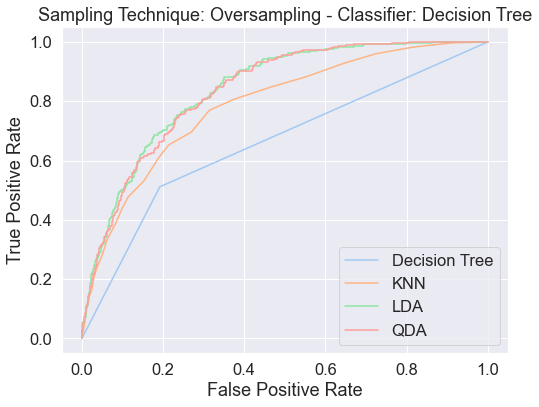

Sampling Technique: Undersampling
-----------------------------
Classifier: KNN
              precision    recall  f1-score   support

           0       0.88      0.69      0.77      1053
           1       0.44      0.72      0.55       352

    accuracy                           0.70      1405
   macro avg       0.66      0.71      0.66      1405
weighted avg       0.77      0.70      0.72      1405

-----------------------------
Classifier: QDA
              precision    recall  f1-score   support

           0       0.94      0.62      0.74      1053
           1       0.43      0.88      0.58       352

    accuracy                           0.68      1405
   macro avg       0.69      0.75      0.66      1405
weighted avg       0.81      0.68      0.70      1405

-----------------------------
Classifier: LDA
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1053
           1       0.48      0.80      0.60       352

    accura

c:\Users\oliwi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Classifier: Decision Tree
              precision    recall  f1-score   support

           0       0.87      0.67      0.75      1053
           1       0.41      0.70      0.52       352

    accuracy                           0.67      1405
   macro avg       0.64      0.68      0.63      1405
weighted avg       0.75      0.67      0.69      1405

-----------------------------


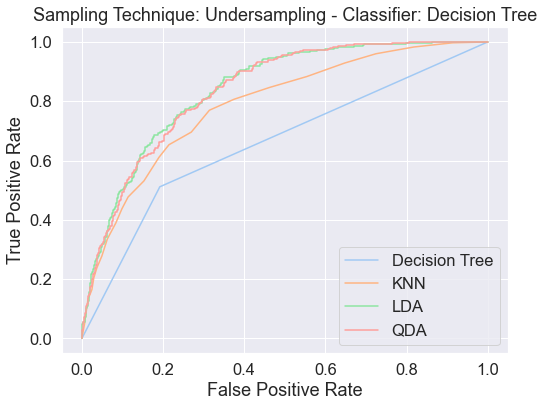

Sampling Technique: Hybrid
-----------------------------
Classifier: KNN
              precision    recall  f1-score   support

           0       0.88      0.68      0.77      1053
           1       0.43      0.71      0.54       352

    accuracy                           0.69      1405
   macro avg       0.65      0.70      0.65      1405
weighted avg       0.76      0.69      0.71      1405

-----------------------------


c:\Users\oliwi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\oliwi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\oliwi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\oliwi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: Undef

Classifier: QDA
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1053
           1       0.00      0.00      0.00       352

    accuracy                           0.75      1405
   macro avg       0.37      0.50      0.43      1405
weighted avg       0.56      0.75      0.64      1405

-----------------------------
Classifier: LDA
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1053
           1       0.51      0.75      0.61       352

    accuracy                           0.76      1405
   macro avg       0.71      0.75      0.72      1405
weighted avg       0.80      0.76      0.77      1405

-----------------------------
Classifier: Decision Tree
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1053
           1       0.50      0.72      0.60       352

    accuracy                           0.75      1405
   macro a

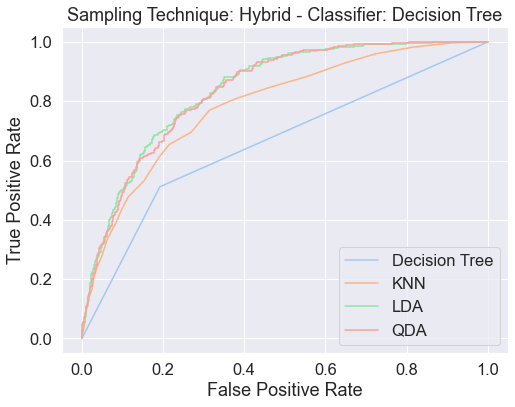

In [ ]:
import matplotlib.pyplot as plt

samplers = {
    "Oversampling": RandomOverSampler(),
    "Undersampling": RandomUnderSampler(),
    "Hybrid": SMOTEENN(),
}

classifiers = {
    "KNN": KNeighborsClassifier(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "LDA": LinearDiscriminantAnalysis(),
    "Decision Tree": DecisionTreeClassifier(),
}

for sampling_name, sampler in samplers.items():
    print(f"Sampling Technique: {sampling_name}")
    print("-----------------------------")
    for classifier_name, classifier in classifiers.items():
        X_sampled, y_sampled = sampler.fit_resample(X_train, y_train)

        classifier.fit(X_sampled, y_sampled)
        y_pred = classifier.predict(X_test)
        report = classification_report(y_test, y_pred)

        print(f"Classifier: {classifier_name}")
        print(report)
        print("-----------------------------")

    plt.figure(figsize=(8, 6))
    plt.title(f"Sampling Technique: {sampling_name} - Classifier: {classifier_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.plot(fpr_dt, tpr_dt, label="Decision Tree")
    plt.plot(fpr_knn, tpr_knn, label="KNN")
    plt.plot(fpr_lda, tpr_lda, label="LDA")
    plt.plot(fpr_qda, tpr_qda, label="QDA")
    plt.legend()
    plt.show()

c:\Users\oliwi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\oliwi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\oliwi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


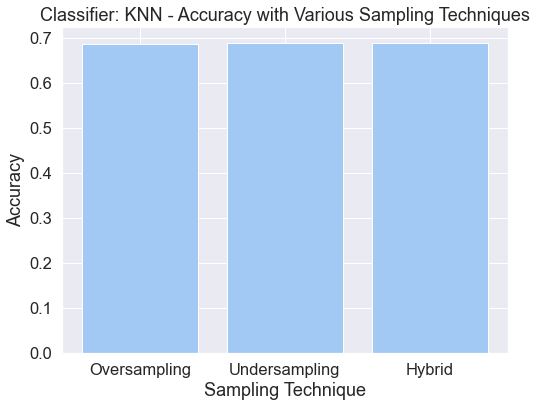

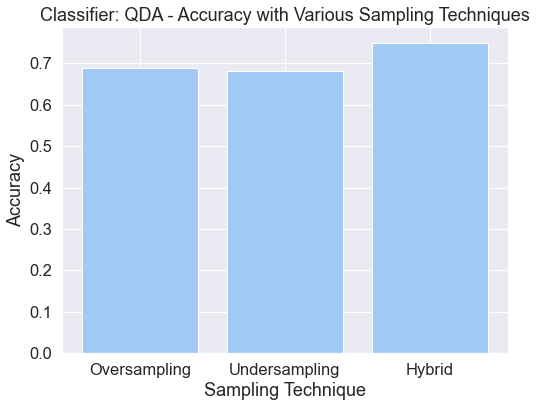

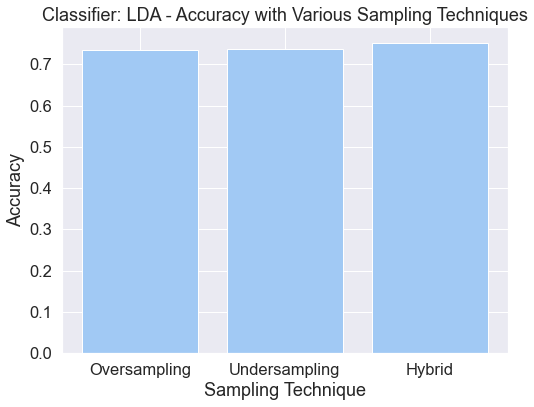

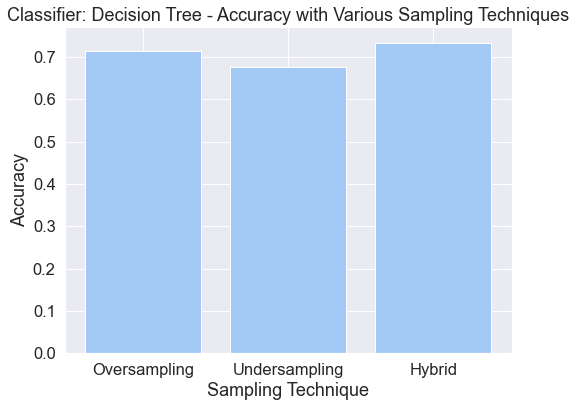

In [ ]:
accuracy_scores = {}

for sampling_name, sampler in samplers.items():
    accuracy_scores[sampling_name] = {}

    X_sampled, y_sampled = sampler.fit_resample(X_train, y_train)

    for classifier_name, classifier in classifiers.items():
        classifier.fit(X_sampled, y_sampled)
        y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        accuracy_scores[sampling_name][classifier_name] = accuracy

for classifier_name in classifiers.keys():
    plt.figure(figsize=(8, 6))
    plt.title(
        f"Classifier: {classifier_name} - Accuracy with Various Sampling Techniques"
    )
    plt.xlabel("Sampling Technique")
    plt.ylabel("Accuracy")
    plt.bar(
        accuracy_scores.keys(),
        [scores[classifier_name] for scores in accuracy_scores.values()],
    )
    plt.show()